In [22]:
!pip install --quiet numpy
!pip install --quiet pandas
!pip install --quiet seaborn
!pip install --quiet matplotlib
!pip install --quiet scikit-learn

In [23]:
!pip install --quiet tensorflow

### Import Libraries

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [85]:
data = make_blobs(n_samples=300, 
                  n_features=2,
                 centers=2,
                 cluster_std=1.0,  #noise
                 random_state=101)

In [86]:
X, y = data

In [87]:
X.shape, y.shape

((300, 2), (300,))

In [88]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [89]:
feat = pd.DataFrame(X)
feat

,0,1
0,-8.877721,-6.760078
1,0.630638,3.107075
2,-0.240609,2.820690
3,-7.839091,-8.207545
4,-10.972908,-7.390676
...,...,...
295,1.320546,2.605592
296,-8.043916,-6.010589
297,-9.733566,-7.460380
298,-10.722075,-5.568565


In [90]:
feat = pd.concat([feat, z_noise], axis=1)
feat.columns = ['X1', 'X2', 'X3']
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


### Visualization in 2D (without noise)

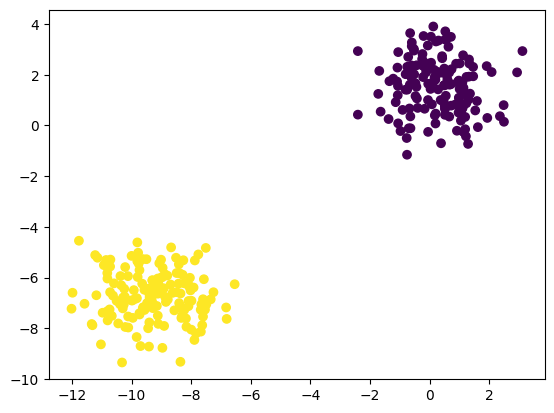

In [91]:
plt.scatter(data=feat, x='X1', y='X2', c=y)
plt.show()

### Visualization in 3D (with noise)

https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#scatter-plots

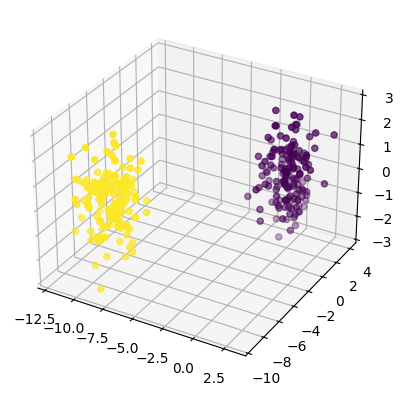

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data=feat, xs='X1', ys='X2', zs='X3', c=y)
plt.show()

### Autoencoders

**Encoder**

In [123]:
encoder = Sequential()
encoder.add(Dense(units=2, activation='relu', input_shape=[3]))

**Decoder**

In [124]:
decoder = Sequential()
decoder.add(Dense(units=3, activation='relu', input_shape=[2]))

In [125]:
autoencoder = Sequential([encoder, decoder])

In [126]:
autoencoder.compile(loss='mse', optimizer=SGD(learning_rate=1.5))

### Scaler

In [127]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [128]:
autoencoder.fit(scaled_data, scaled_data, epochs=5) 

Epoch 1/5
10/10 [==============================] - 1s 4ms/step - loss: 0.1806
Epoch 2/5
10/10 [==============================] - 0s 4ms/step - loss: 0.1862
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 0.1437
Epoch 4/5
10/10 [==============================] - 0s 3ms/step - loss: 0.1647
Epoch 5/5
10/10 [==============================] - 0s 4ms/step - loss: 0.1514


In [129]:
encoded_2D = encoder.predict(scaled_data)

10/10 [==============================] - 0s 2ms/step


In [130]:
encoded_2D.shape, scaled_data.shape

((300, 2), (300, 3))

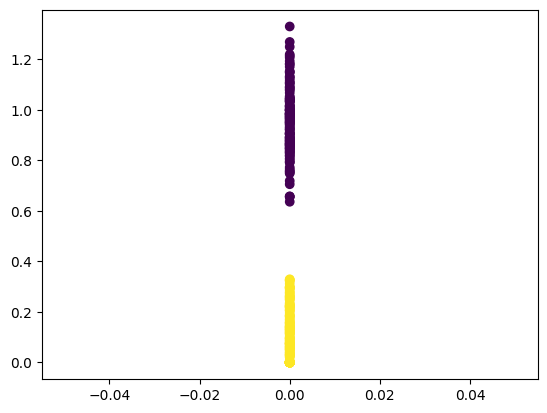

In [131]:
plt.scatter(encoded_2D[:,0], encoded_2D[:, 1], c=y)
plt.show()